In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("dataset_small.csv")

In [4]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,4,2,3598,0,0,0,0,0,0
1,4,0,0,2,0,0,0,0,0,0,...,1,4,1,3977,1,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,2,1,10788,0,0,0,0,0,0
3,2,0,0,3,0,0,0,0,0,0,...,1,2,1,14339,1,0,0,0,0,1
4,1,1,0,4,0,0,0,0,0,0,...,1,2,1,389,1,1,0,0,0,1


In [6]:
df.tail()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
58640,1,0,0,5,0,1,0,0,0,0,...,1,2,2,563,0,0,0,0,0,1
58641,2,0,0,0,0,0,0,0,0,0,...,1,4,0,122,1,0,0,0,0,0
58642,5,6,3,6,0,2,1,1,0,0,...,1,2,1,1122,0,0,0,0,0,1
58643,2,0,0,0,0,0,0,0,0,0,...,5,2,5,299,1,1,0,0,0,0
58644,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3361,1,0,0,0,0,0


In [7]:
df.isnull().sum()

qty_dot_url             0
qty_hyphen_url          0
qty_underline_url       0
qty_slash_url           0
qty_questionmark_url    0
                       ..
qty_redirects           0
url_google_index        0
domain_google_index     0
url_shortened           0
phishing                0
Length: 112, dtype: int64

In [8]:
df['phishing'].value_counts()

1    30647
0    27998
Name: phishing, dtype: int64

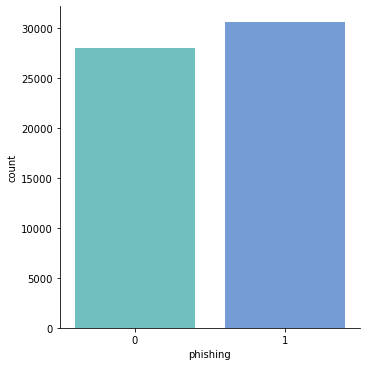

In [9]:
sns.catplot(data=df, x="phishing", kind="count", palette="winter_r", alpha=.6)
plt.show()

In [10]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 112 numerical features : ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [12]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [13]:
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [14]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\91982\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

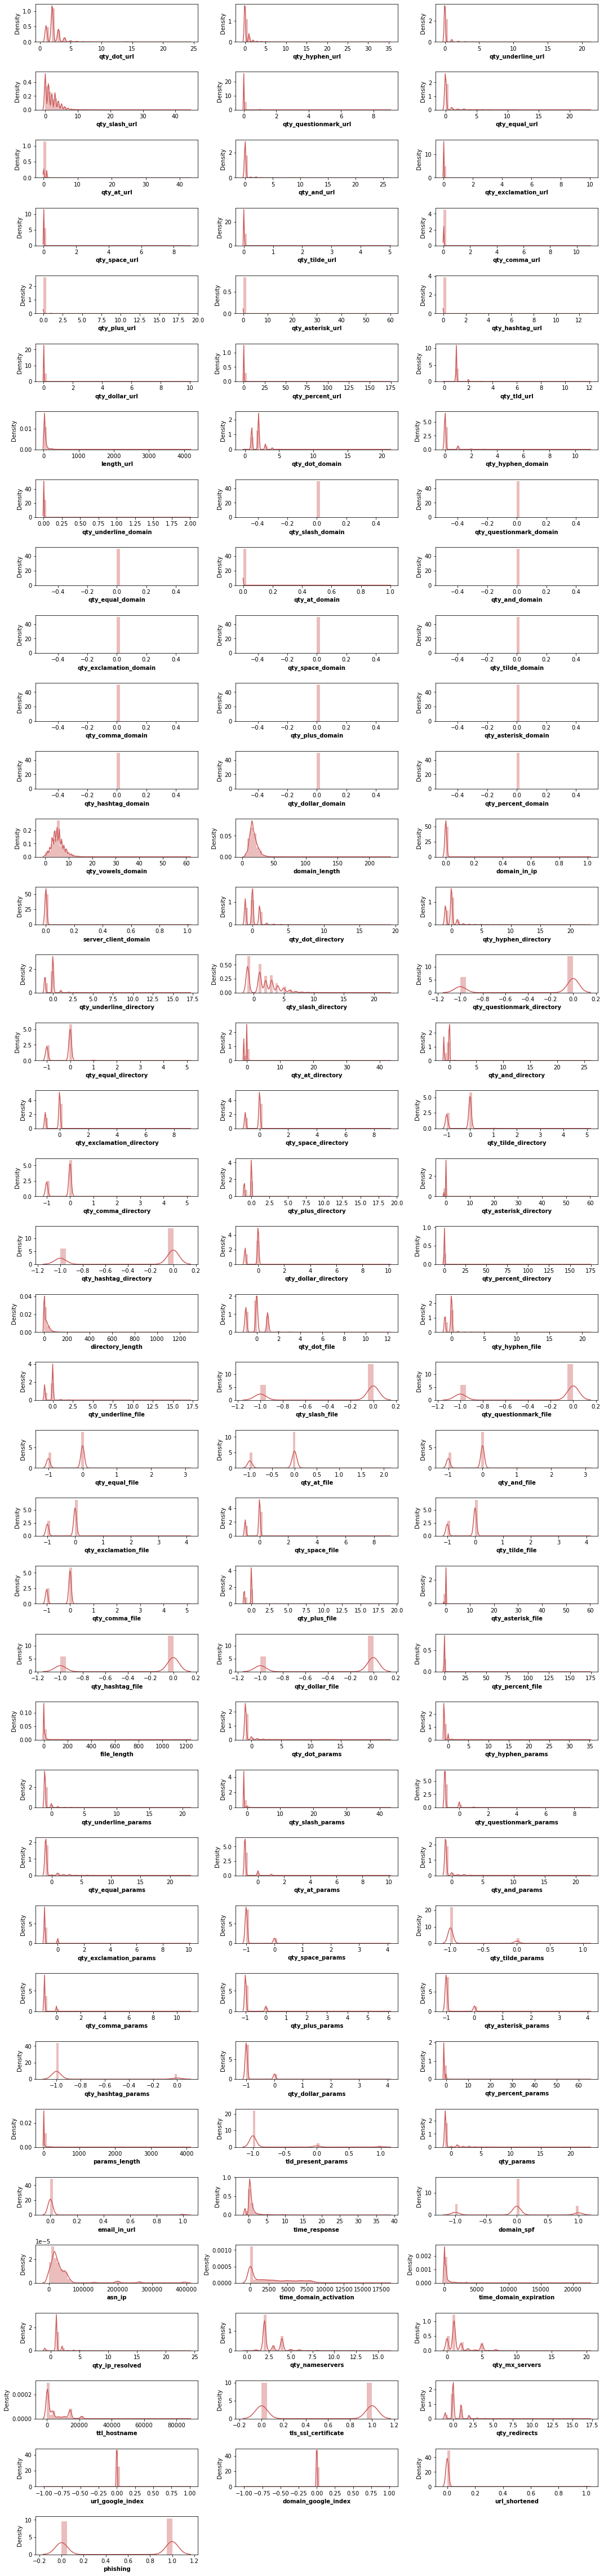

In [15]:
numeric_features = [feature for feature in df.columns ]

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [17]:
df1=df

In [18]:
X= df.drop('phishing', axis=1)
y =df['phishing']

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score

[1.51777320e-02 1.01417972e-02 3.19901854e-03 3.19035994e-02
 2.15597910e-04 1.84035997e-03 6.28382608e-04 1.03833058e-03
 2.37647219e-04 1.52872003e-05 2.28506058e-04 1.18901140e-04
 2.66687068e-04 5.49602083e-05 3.75795651e-06 2.61369665e-05
 1.51139478e-03 2.95469058e-03 2.94088700e-02 2.37065313e-02
 6.55926274e-03 3.01486036e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.14199009e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.28502238e-02 2.38189288e-02 7.64538541e-04 4.67744881e-04
 1.16040246e-02 1.08583768e-02 2.65113327e-03 3.81676087e-02
 3.50328918e-02 1.22263052e-02 5.26616577e-04 4.01151331e-03
 6.64743603e-03 3.94692241e-03 4.15657412e-03 3.26893778e-03
 4.01452234e-03 6.14000036e-05 3.11953148e-02 3.95314066e-03
 9.44499735e-04 2.97172994e-02 1.66437790e-02 5.99234301e-03
 2.67389782e-03 3.08690873e-02 3.99208807e-02 2.20555044e-02
 2.25847344e-02 2.091906

<function matplotlib.pyplot.show(close=None, block=None)>

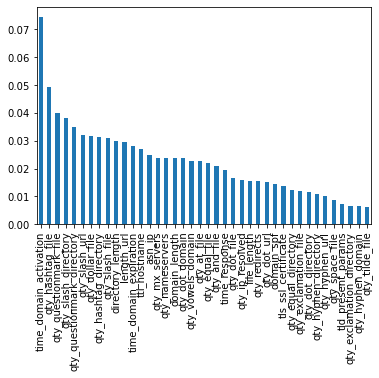

<Figure size 1080x360 with 0 Axes>

In [22]:
numbered_features=X
model1=ExtraTreesClassifier()
model1.fit(X,y)
print(model1.feature_importances_)
feat_importances=pd.Series(model1.feature_importances_,index=X.columns)
largest_thirty=feat_importances.nlargest(28)
feat_importances.nlargest(40).plot(kind='bar')
plt.figure(figsize = (15,5))
plt.show

In [23]:
largest_thirty=feat_importances.nlargest(28)
smallest_seventy=feat_importances.nsmallest(90)
print(largest_thirty)

time_domain_activation        0.074420
qty_hashtag_file              0.049323
qty_questionmark_file         0.039921
qty_slash_directory           0.038168
qty_questionmark_directory    0.035033
qty_slash_url                 0.031904
qty_dollar_file               0.031512
qty_hashtag_directory         0.031195
qty_slash_file                0.030869
directory_length              0.029717
length_url                    0.029409
time_domain_expiration        0.028129
ttl_hostname                  0.027060
asn_ip                        0.024813
qty_mx_servers                0.023936
qty_nameservers               0.023848
domain_length                 0.023819
qty_dot_domain                0.023707
qty_vowels_domain             0.022850
qty_at_file                   0.022585
qty_equal_file                0.022056
qty_and_file                  0.020919
time_response                 0.019484
qty_dot_file                  0.016644
qty_ip_resolved               0.015960
file_length              

In [25]:
df2=feat_importances.nsmallest(92).div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)
print(df2)

                            0
qty_at_file          0.000039
qty_equal_file       0.000038
qty_and_file         0.000036
time_response        0.000033
qty_dot_file         0.000028
...                       ...
qty_asterisk_domain  0.000000
qty_hashtag_domain   0.000000
qty_dollar_domain    0.000000
qty_percent_domain   0.000000
qty_slash_domain     0.000000

[92 rows x 1 columns]


In [26]:
df.drop(list(df2.index),axis=1,inplace=True)

In [27]:
df.shape

(58645, 20)

In [28]:
df.head()

,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_slash_directory,qty_questionmark_directory,qty_hashtag_directory,directory_length,qty_slash_file,qty_questionmark_file,qty_hashtag_file,qty_dollar_file,asn_ip,time_domain_activation,time_domain_expiration,qty_nameservers,qty_mx_servers,ttl_hostname,phishing
0,0,14,2,3,14,-1,-1,-1,-1,-1,-1,-1,-1,8560,4927,185,4,2,3598,0
1,2,38,4,10,32,2,0,0,6,0,0,0,0,263283,8217,-1,4,1,3977,0
2,1,24,1,7,23,1,0,0,1,0,0,0,0,26496,258,106,2,1,10788,0
3,3,38,2,7,25,3,0,0,13,0,0,0,0,20013,2602,319,2,1,14339,1
4,4,46,1,7,19,4,0,0,27,0,0,0,0,41828,-1,-1,2,1,389,1


In [29]:
df.tail()

,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_slash_directory,qty_questionmark_directory,qty_hashtag_directory,directory_length,qty_slash_file,qty_questionmark_file,qty_hashtag_file,qty_dollar_file,asn_ip,time_domain_activation,time_domain_expiration,qty_nameservers,qty_mx_servers,ttl_hostname,phishing
58640,5,122,1,5,13,5,0,0,109,0,0,0,0,63949,542,187,2,2,563,1
58641,0,20,2,7,20,-1,-1,-1,-1,-1,-1,-1,-1,15169,-1,-1,4,0,122,0
58642,6,161,3,8,38,6,0,0,55,0,0,0,0,26496,-1,-1,2,1,1122,1
58643,0,14,2,4,14,-1,-1,-1,-1,-1,-1,-1,-1,13335,1943,247,2,5,299,0
58644,3,47,2,9,28,3,0,0,19,0,0,0,0,55053,-1,-1,2,1,3361,0


In [30]:
X= df.drop('phishing', axis=1)
y = df['phishing']

In [32]:
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline(steps=[
    ('StandardScaler', StandardScaler())
])

In [33]:
X_pipeline =pipeline.fit_transform(X)

In [34]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [49]:
from sklearn.model_selection import train_test_split
X_trans=StandardScaler()
X_trans.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

report_models = evaluate_models(X_train, y_train, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9998
- Recall: 0.9996
- Roc Auc Score: 0.9997
- COST: 4030.
----------------------------------
Model performance for Test set
- Accuracy: 0.9508
- F1 score: 0.9527
- Precision: 0.9479
- Recall: 0.9576
- Roc Auc Score: 0.9505
- COST: 105560.


Decision Tree
Model performance for Training set
- Accuracy: 0.9997
- F1 score: 0.9997
- Precision: 0.9999
- Recall: 0.9995
- Roc Auc Score: 0.9997
- COST: 4510.
----------------------------------
Model performance for Test set
- Accuracy: 0.9269
- F1 score: 0.9293
- Precision: 0.9314
- Recall: 0.9272
- Roc Auc Score: 0.9269
- COST: 180320.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9269
- F1 score: 0.9307
- Precision: 0.9234
- Recall: 0.9381
- Roc Auc Score: 0.9263
- COST: 623290.
----------------------------------
Model performance for Test set
- Accuracy: 0.9194
- F1 score: 0.9230
- Precision: 0.9135
- Recall: 0.9327
-

C:\Users\91982\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.8623
- F1 score: 0.8726
- Precision: 0.8463
- Recall: 0.9007
- Roc Auc Score: 0.8604
- COST: 1008150.
----------------------------------
Model performance for Test set
- Accuracy: 0.8517
- F1 score: 0.8621
- Precision: 0.8313
- Recall: 0.8953
- Roc Auc Score: 0.8500
- COST: 263330.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8884
- F1 score: 0.8947
- Precision: 0.8840
- Recall: 0.9057
- Roc Auc Score: 0.8876
- COST: 949850.
----------------------------------
Model performance for Test set
- Accuracy: 0.8421
- F1 score: 0.8504
- Precision: 0.8347
- Recall: 0.8667
- Roc Auc Score: 0.8412
- COST: 332340.


XGBClassifier
Model performance for Training set
- Accuracy: 0.9737
- F1 score: 0.9749
- Precision: 0.9733
- Recall: 0.9765
- Roc Auc Score: 0.9735
- COST: 236260.
----------------------------------
Model performance for Test set
- Accuracy: 0.9498
- F1 score: 0.9517
- Precision: 0.9494
- 

In [52]:
report_models

,Model Name,Cost
0,Random Forest,105560
5,XGBClassifier,114470
6,CatBoosting Classifier,122020
2,Gradient Boosting,167790
1,Decision Tree,180320
7,AdaBoost Classifier,228380
3,Logistic Regression,263330
4,K-Neighbors Classifier,332340


In [50]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_train, y_train)

In [51]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 0.9999
- Recall: 0.9997
- Roc Auc Score: 0.9998
- COST: 2520.
----------------------------------
Model performance for Test set
- Accuracy: 0.9584
- F1 score: 0.9587
- Precision: 0.9507
- Recall: 0.9669
- Roc Auc Score: 0.9584
- COST: 79330.


Decision Tree
Model performance for Training set
- Accuracy: 0.9998
- F1 score: 0.9998
- Precision: 1.0000
- Recall: 0.9996
- Roc Auc Score: 0.9998
- COST: 3500.
----------------------------------
Model performance for Test set
- Accuracy: 0.9342
- F1 score: 0.9343
- Precision: 0.9317
- Recall: 0.9369
- Roc Auc Score: 0.9342
- COST: 149690.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9337
- F1 score: 0.9341
- Precision: 0.9287
- Recall: 0.9396
- Roc Auc Score: 0.9337
- COST: 574920.
----------------------------------
Model performance for Test set
- Accuracy: 0.9287
- F1 score: 0.9295
- Precision: 0.9183
- Recall: 0.9410
- 

C:\Users\91982\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.8451
- F1 score: 0.8410
- Precision: 0.8637
- Recall: 0.8195
- Roc Auc Score: 0.8451
- COST: 1702040.
----------------------------------
Model performance for Test set
- Accuracy: 0.8410
- F1 score: 0.8377
- Precision: 0.8550
- Recall: 0.8211
- Roc Auc Score: 0.8410
- COST: 421970.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9088
- F1 score: 0.9095
- Precision: 0.9028
- Recall: 0.9162
- Roc Auc Score: 0.9088
- COST: 797330.
----------------------------------
Model performance for Test set
- Accuracy: 0.8606
- F1 score: 0.8618
- Precision: 0.8540
- Recall: 0.8698
- Roc Auc Score: 0.8606
- COST: 309410.


XGBClassifier
Model performance for Training set
- Accuracy: 0.9790
- F1 score: 0.9790
- Precision: 0.9792
- Recall: 0.9788
- Roc Auc Score: 0.9790
- COST: 200870.
----------------------------------
Model performance for Test set
- Accuracy: 0.9570
- F1 score: 0.9573
- Precision: 0.9504
- 

In [53]:
report_knn

,Model Name,Cost
0,Random Forest,79330
5,XGBClassifier,85340
6,CatBoosting Classifier,90430
2,Gradient Boosting,140890
1,Decision Tree,149690
7,AdaBoost Classifier,215730
4,K-Neighbors Classifier,309410
3,Logistic Regression,421970


In [39]:
rand_clf=RandomForestClassifier(random_state=42)
rand_clf.fit(X_res,y_res)

RandomForestClassifier(random_state=42)

In [58]:
# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority' , n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_pipeline, y)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)

final_model = rand_clf.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

In [60]:
y_pred = final_model.predict(X_test)

In [63]:
print("Final RandomForest Classifier Accuracy Score (Train) :", final_model.score(X_train,y_train))
print("Final RandomForest Classifier Accuracy Score (Test) :", accuracy_score(y_pred,y_test))

Final RandomForest Classifier Accuracy Score (Train) : 0.9998333055509252
Final RandomForest Classifier Accuracy Score (Test) : 0.9628271378563094


In [64]:
rand_clf.score(X_test,y_test)

0.9628271378563094

In [65]:
print("Final RandomForest Classifier Cost Metric(Test) :",total_cost(y_test, y_pred))


Final RandomForest Classifier Cost Metric(Test) : 89230


C:\Users\91982\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


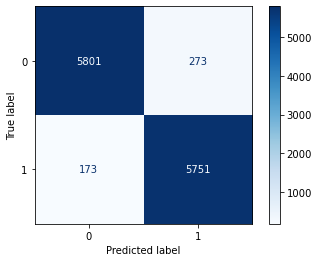

In [66]:
from sklearn.metrics import plot_confusion_matrix

#plots Confusion matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap='Blues', values_format='d')